In [1]:
import os
#suppress TensorFlow's log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 1. Data Preparation Summary

All WAV files underwent a resampling process to ensure a uniform sample rate of 16,000 Hz. In the feature extraction phase, we computed 13 Mel-Frequency Cepstral Coefficients (MFCCs) using window sizes of 50ms, 100ms, and 500ms, with a 50% overlap to facilitate smooth transitions between adjacent frames. Experiments were performed on all the window sizes and empirically determined the window size of 100ms delivering the best results.

To address the challenge of varying MFCC sequence lengths across audio segments, we adopted a standardized approach. Shorter segments were padded with zero values while longer segments were truncated to align with the average length of snoring moments. 

For machine learning models, we computed the mean and standard deviation (SD) of the values for each of the 13 MFCC coefficients across all frames. During model training and testing, we experimented with two feature sets: one utilizing the mean values alone and another incorporating both the mean and standard deviation (SD) data for each MFCC coefficient. Notably, the inclusion of both mean and SD data yielded superior results in our evaluations, indicating the advantage of utilizing this combined feature set for model training and classification.

# 2. Binary Classification
For the binary classification task of distinguishing between snoring and non-snoring moments, we assigned the label "0" to all non-snoring moments and the label "1" to snoring moments with varying intensities, denoted as "S1," "S2," and "S3."

We conducted experiments using a range of machine learning (ML) and deep learning (DL) methods, including three traditional machine learning algorithms: Linear Regression, Support Vector Machine (SVM), and XGBoost; and four deep learning architectures: Convolutional Neural Network (CNN), CNN with Long Short-Term Memory (LSTM) layer, Transformer, and Conformer.

These models were trained and thier performances are compared in the sections below:

## 2.1. Machine Learning Models

The trained models and test data has been saved in appropriate format and are loaded in the following sections to perform prediction for comparison.

### 2.1.1 XGBOOST

Load the model and the testing set for XGBoost, perform prediction on test set and compute performance scores. 

In [2]:
#load the test data for predition
ml_test_data=np.load('ml/2 classes/ml_test_data_2_100.npy', allow_pickle=True).item()
X_test_ml = ml_test_data['X_test']
y_test_ml = ml_test_data['y_test']

In [3]:
#Load XGBoost Model
xgboost_model = joblib.load('ml/2 classes/ml_2_100.sav')
y_test_pred_xg=xgboost_model.predict(X_test_ml)

In [4]:
#function to calculate scores. This function will be reused for other models as well
def calculate_accuracies(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision,recall,f1

In [5]:
#calculate the performance scores for the XGBoost model
xg_accuracy, xg_precision, xg_recall,xg_f1_score=calculate_accuracies(y_test_ml,y_test_pred_xg)

### 2.1.2 Support Vector Machine (SVM)
Load the SVM model, perform prediction on test data and calculate performance scores. 

In [6]:
#load the test data for the SVM model
ml_test_data=np.load('ml/50 ms/ml_test_data_mean_50.npy', allow_pickle=True).item()
X_test_ml_lrsvm = ml_test_data['X_test']
y_test_ml_lrsvm = ml_test_data['y_test']

In [7]:
# load the SVM model
svm_model = joblib.load('ml/50 ms/ml_svm_mean_50.sav')
y_test_pred_svm=svm_model.predict(X_test_ml_lrsvm)

/Users/ddcbhutan/miniconda3/envs/cits5017-2023/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
# #calculate the performance scores for the XGBoost model
svm_accuracy, svm_precision, svm_recall,svm_f1_score=calculate_accuracies(y_test_ml_lrsvm,y_test_pred_svm)

### 2.1.3 Linear Regression Model
Load the linear regression model, perform prediction and compute scores. The test data used for LR model is as same as the one used for SVM model.

In [9]:
# load the model and perform prediction
lr_model = joblib.load('ml/50 ms/ml_lr1_mean_50.sav')
y_test_pred_lr=lr_model.predict(X_test_ml_lrsvm)

/Users/ddcbhutan/miniconda3/envs/cits5017-2023/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
#calculate the performance scores
lr_accuracy, lr_precision, lr_recall,lr_f1_score=calculate_accuracies(y_test_ml_lrsvm,y_test_pred_lr)

# 2.2. Deep Learning Models

### 2. 2.1  CNN model
Load the CNN model and the test data.  Perform prediction on the test data and compute the scores. 

In [11]:
# load the test set for CNN model
cnn_test_data = np.load('cnn_lstm_test_data.npy', allow_pickle=True).item()
X_test_cnn = cnn_test_data['X_test']
y_test_cnn = cnn_test_data['y_test']

In [12]:
# load the CNN model
cnn_model=load_model("bin_cnn_model")

In [13]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 13, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 62, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 6, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 6, 64)         18496     
                                                                 
 batch_normalization_8 (Batc  (None, 31, 6, 64)        256       
 hNormalization)                                                 
                                                      

The architecture is constructed using a sequential model building approach. It begins with a custom convolutional layer created via the DefaultConv2D function, which permits users to specify the number of filters, kernel size, activation function, and L1 and L2 regularization terms.The input shape is defined as (num_mfccs, 13, 1), indicating the model's suitability for processing Mel-frequency cepstral coefficients (MFCCs).

Following the initial convolutional layer, the architecture incorporates BatchNormalization layers to standardize the activations and enhance training stability. Max-pooling layers are then applied to downsample the feature maps, reducing their spatial dimensions. This repetitive pattern of convolutional layer, batch normalization, and max-pooling is pivotal for capturing hierarchical features in the data, a fundamental characteristic of CNNs.

The Flatten layer in the architecture transforms the 3D feature maps into a 1D vector. This vector serves as the input for subsequent layers. The model includes a Dropout layer with a dropout rate specified by the dr parameter. The application of dropout is a key strategy to mitigate overfitting by randomly deactivating a portion of neurons during training.

Two dense layers follow: the first one consists of 64 units and employs activation function, weight initialization method, and regularization terms. The second dense layer corresponds to the output layer, with the number of units determined by the classification type. For binary classification, it contains a single unit, while for multi-class classification, the number of units aligns with the number of classes. The activation function for the output layer is either sigmoid or softmax, depending on the classification scenario.

The model is compiled using Stochastic Gradient Descent (SGD) as the optimizer. The learning rate and momentum are user-specified (obtained through hyper parameter tuning). The learning rate is further adaptable during training using the ReduceLROnPlateau callback, which reduces the learning rate by a factor of 0.5 if the validation loss plateaus. Additionally, the EarlyStopping callback is included, which halts training if the validation loss fails to improve for a user-defined number of epochs.

The accuracy was acheived with no of filters 32, kernel size 3, relu activation function, glorot_normal weight initialization, initial learning rate of 0.001, drop out rate of 30%.

In [14]:
#perform prediciton on CNN model
y_test_pred_cnn= cnn_model.predict(X_test_cnn)
y_test_pred_cnn = (y_test_pred_cnn >= 0.5).astype(int)

240/240 [==============================] - 2s 6ms/step


In [15]:
# calculate performance scores
cnn_accuracy, cnn_precision, cnn_recall,cnn_f1_score=calculate_accuracies(y_test_cnn,y_test_pred_cnn)

### 2.2.2. CNN + LSTM model
Snoring patterns often occur over time, and the timing and duration of snores can be crucial for detection. As LSTMs are designed to handle sequential data and can capture dependencies over time, we tried LSTM with CNN.

Test data for this model is as same as the CNN model. CNN model follows the similar structure like the CNN model but LSTM model has 2 LSTM layers for capturing temporal dependencies in the audio data..

In [16]:
#Load the CNN model
cnn_lstm_model=load_model("bin_cnn_lstm")

In [17]:
#perform prediction on CNN
y_test_pred_cnn_lstm= cnn_lstm_model.predict(X_test_cnn)
y_test_pred_cnn_lstm = (y_test_pred_cnn_lstm >= 0.5).astype(int)

240/240 [==============================] - 3s 10ms/step


In [18]:
# compute scores
cnnlstm_accuracy, cnnlstm_precision, cnnlstm_recall,cnnlstm_f1_score=calculate_accuracies(y_test_cnn,y_test_pred_cnn_lstm)

### 2.2.3 Transformer models
Transformer or self-attention models were chosen as suitable models to experiment with due to the capability of multi-head attention blocks to capture long range patterns and success in speech recognition tasks 

In [19]:
#load the data for transformer model
X_test_tc = np.load('X_test_100.npy')
y_test_tc = np.load('y_test_100_B.npy')

In [20]:
#load the model
transformer_model=load_model("Transformer_Model")

In [21]:
#perform prediction
y_test_pred_trans= transformer_model.predict(X_test_tc[:,:,:-1])
y_test_pred_trans = (y_test_pred_trans >= 0.5).astype(int)

240/240 [==============================] - 4s 16ms/step


In [22]:
#calculate performance scores
trans_accuracy, trans_precision, trans_recall,trans_f1_score=calculate_accuracies(y_test_tc,y_test_pred_trans)

### 2.2.4. Conformer Model
The Conformer model is an extension of the transformer architecture where the multi head attention block is sandwiched between two convolutional blocks and is testing if the combination of convolutional layers with muti-head attention layers will yield better results. 

The dataset is used as same as the transformer model.

In [23]:
#load the model
conformer_model=load_model("conformer_Model")

In [24]:
# perform prediction
y_test_pred_con= conformer_model.predict(X_test_tc[:,:,:-1])
y_test_pred_con = (y_test_pred_con >= 0.5).astype(int)

240/240 [==============================] - 4s 16ms/step


In [25]:
#calculate accuracy
con_accuracy, con_precision, con_recall, con_f1_score=calculate_accuracies(y_test_tc,y_test_pred_con)

# 1.3. Compare the Models
Let's compare the performance of all the models.

## 1.3.1 Compare Accuracy, Precision, Recall and F1

In [26]:
performance_metrics = {
    "Model": ["XGboost", "SVM", "LR", "CNN", "CNN+LSTM", "Transformer", "Conformer"],
    "Accuracy": [f"{xg_accuracy:.2%}", f"{svm_accuracy:.2%}", f"{lr_accuracy:.2%}",f"{cnn_accuracy:.2%}", f"{cnnlstm_accuracy:.2%}", f"{trans_accuracy:.2%}", f"{con_accuracy:.2%}"],
    "Precision": [f"{xg_precision:.2%}", f"{svm_precision:.2%}", f"{lr_precision:.2%}", f"{cnn_precision:.2%}", f"{cnnlstm_precision:.2%}", f"{trans_precision:.2%}", f"{con_precision:.2%}"],
    "Recall": [f"{xg_recall:.2%}", f"{svm_recall:.2%}", f"{lr_recall:.2%}", f"{cnn_recall:.2%}", f"{cnnlstm_recall:.2%}", f"{trans_recall:.2%}", f"{con_recall:.2%}"],
    "F1 Score": [f"{xg_f1_score:.2%}", f"{svm_f1_score:.2%}", f"{lr_f1_score:.2%}", f"{cnn_f1_score:.2%}", f"{cnnlstm_f1_score:.2%}", f"{trans_f1_score:.2%}", f"{con_f1_score:.2%}"]
}

performance_metrics_df = pd.DataFrame(performance_metrics)
performance_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGboost,95.55%,95.56%,95.55%,95.54%
1,SVM,81.56%,81.60%,81.56%,81.53%
2,LR,83.19%,83.19%,83.19%,83.18%
3,CNN,97.73%,97.73%,97.73%,97.73%
4,CNN+LSTM,96.64%,96.64%,96.64%,96.64%
5,Transformer,97.38%,97.39%,97.38%,97.38%
6,Conformer,97.56%,97.57%,97.56%,97.56%


The XGBoost model emerged as the best Machine Learning (ML) model, achieving an accuracy of 95.55% and maintaining a well-balanced precision, recall, and F1 Score. It showcases strong classification capabilities and accuracy in distinguishing snoring moments.

Among the Deep Learning (DL) models, the CNN model demonstrated the highest accuracy at 97.73% and recall of 97.97%. This makes it the top choice for deep learning-based snoring moment detection.


# 1.3.2. ROC curve

In [50]:
#Function to plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(y_ml, y_pred_xg,y_test_ml_lrsvm, y_test_pred_lr, y_test_pred_svm, y_cnn, y_pred_cnn,y_pred_cnnlstm, X_test_tc, y_test_pred_trans, title="ROC Curve"):
    
    #code for xgboost
    fpr_xg, tpr_xg, _ = roc_curve(y_ml, y_pred_xg)
    auc_xg = roc_auc_score(y_ml, y_pred_xg)
    
    #code for LR
    fpr_lr, tpr_lr, _ = roc_curve(y_test_ml_lrsvm, y_test_pred_lr)
    auc_lr = roc_auc_score(y_test_ml_lrsvm, y_test_pred_lr)
    
    #code for svm
    fpr_svm, tpr_svm, _ = roc_curve(y_test_ml_lrsvm, y_test_pred_svm)
    auc_svm = roc_auc_score(y_test_ml_lrsvm, y_test_pred_svm)
    

    #code for CNN
    fpr_cnn, tpr_cnn, _ = roc_curve(y_cnn, y_pred_cnn)
    auc_cnn = roc_auc_score(y_cnn, y_pred_cnn)
    #code for CNN+LSTM
    fpr_cnnlstm, tpr_cnnlstm, _ = roc_curve(y_cnn, y_pred_cnnlstm)
    auc_cnnlstm = roc_auc_score(y_cnn, y_pred_cnnlstm)

    
    #code for transformer
    fpr_tran, tpr_tran, _ = roc_curve(y_test_tc, y_test_pred_trans)
    auc_tran = roc_auc_score(y_test_tc, y_test_pred_trans)
    #code for conformer
    fpr_con, tpr_con, _ = roc_curve(y_test_tc, y_test_pred_con)
    auc_con = roc_auc_score(y_test_tc, y_test_pred_con)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xg, tpr_xg, color='grey', lw=1, linestyle='-.', label=f'XGBoost(AUC = {auc_xg:.3f})')
    plt.plot(fpr_lr, tpr_lr, color='grey', lw=1, linestyle='--', label=f'Linear Regression (AUC = {auc_lr:.3f})')
    plt.plot(fpr_svm, tpr_svm, color='grey', lw=1, linestyle='-', label=f'SVM (AUC = {auc_svm:.3f})')
    
    plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=0.5, label=f'CNN (AUC = {auc_cnn:.3f})')
    plt.plot(fpr_cnnlstm, tpr_cnnlstm, color='lightsteelblue', lw=0.5, label=f'CNN +LSTM (AUC = {auc_cnnlstm:.3f})')
    
    plt.plot(fpr_tran, tpr_tran, color='coral', lw=0.5, label=f'Transformer (AUC = {auc_tran:.3f})')
    plt.plot(fpr_con, tpr_con, color='red', lw=0.5, label=f'Conformer (AUC = {auc_con:.3f})')
    
    #plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

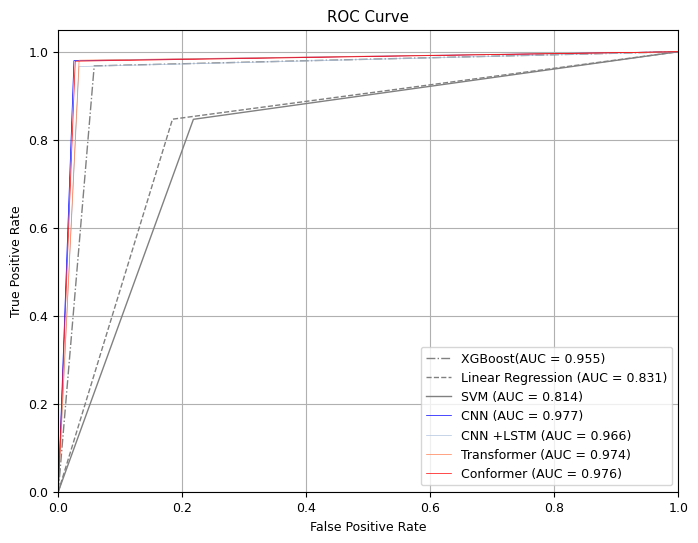

In [51]:
plot_roc_curve(y_test_ml, y_test_pred_xg,y_test_ml_lrsvm,y_test_pred_lr,y_test_pred_svm, y_test_cnn, y_test_pred_cnn,y_test_pred_cnn_lstm,  X_test_tc, y_test_pred_trans, title="CNN Model ROC Curve")

As depicted in the plot, the CNN, transformer and conformer models are comparable with AUC higher than 0.97. CNN is the best with the highest AUC. The Linear Regression model has the lowest AUC

## 1.4. Comparing the Best ML and Best DL Modles
The best deep learning model is the CNN model and the best ML model is the XGBoost. Let's compare the two further.

### 1.4.1. Performance Metrics Comparison

<Figure size 1000x600 with 0 Axes>

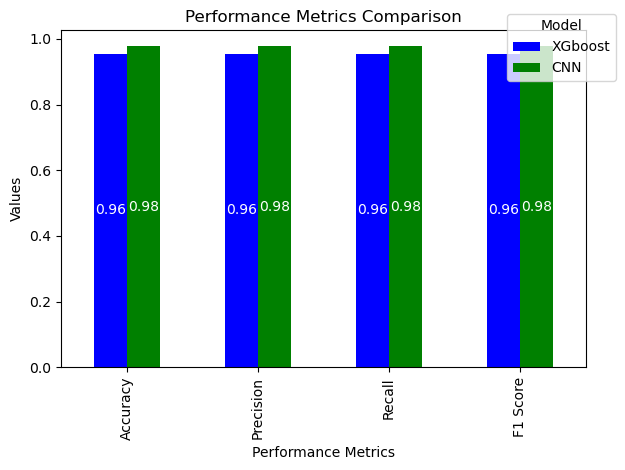

In [29]:
performance_metrics = {
    "Model": ["XGboost", "CNN"],
    "Accuracy": [xg_accuracy, cnn_accuracy],
    "Precision": [xg_precision, cnn_precision],
    "Recall": [xg_recall, cnn_recall],
    "F1 Score": [xg_f1_score, cnn_f1_score]
}

performance_metrics_df = pd.DataFrame(performance_metrics)

colors = ['b', 'g']
plt.figure(figsize=(10, 6))
ax = performance_metrics_df.set_index('Model').T.plot(kind='bar', color=colors)
plt.xlabel('Performance Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
ax.legend(title='Model', loc=(0.85, 0.85))
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f', label_type='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()


he DL model consistently outperforms the ML model across all performance metrics.

## 1.4.2. Confusion Matrix

plot confusion matrices of all the models here

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def print_conf_matrix(y_ml, y_ml_pred, y_dl, y_dl_pred, class_names):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_ml, y_ml_pred, ax=axs[0], display_labels=class_names).im_.colorbar.remove()
    axs[0].set_title("ML (XGBoost) ")
    axs[0].tick_params(axis='x', labelrotation=90)
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_dl, y_dl_pred, ax=axs[1], display_labels=class_names).im_.colorbar.remove()
    axs[1].set_title("DL (CNN) ")
    axs[1].tick_params(axis='x', labelrotation=90)
    plt.show()

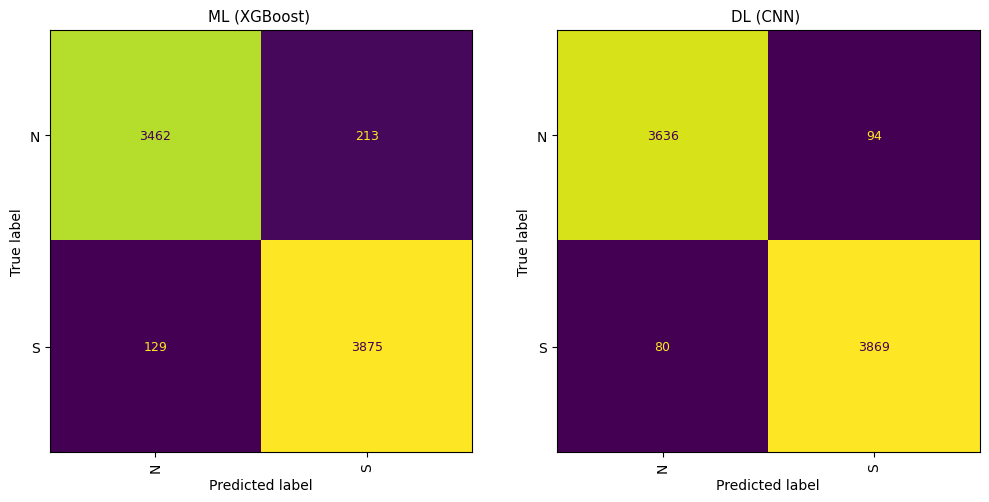

In [31]:
class_names=['N','S']
print_conf_matrix(y_test_ml, y_test_pred_xg, y_test_cnn, y_test_pred_cnn, class_names)

## 1.4.3. Precision-Recall Curves
Create precision-recall curves for both models. These curves show the trade-off between precision and recall and are particularly useful when dealing with imbalanced datasets.

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_precision_vs_recall(y_ml, y_pred_ml, y_dl, y_pred_dl):
    precisions_ml, recalls_ml, _ = precision_recall_curve(y_ml, y_pred_ml)
    precisions_dl, recalls_dl, _ = precision_recall_curve(y_dl, y_pred_dl)

    plt.figure(figsize=(10, 4))
    plt.plot(recalls_ml, precisions_ml, "b-", label="ML", linewidth=1)
    plt.plot(recalls_dl, precisions_dl, "r-", label="DL", linewidth=1)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)

    plt.title("Precision vs. Recall Plot")
    plt.legend()
    plt.show()


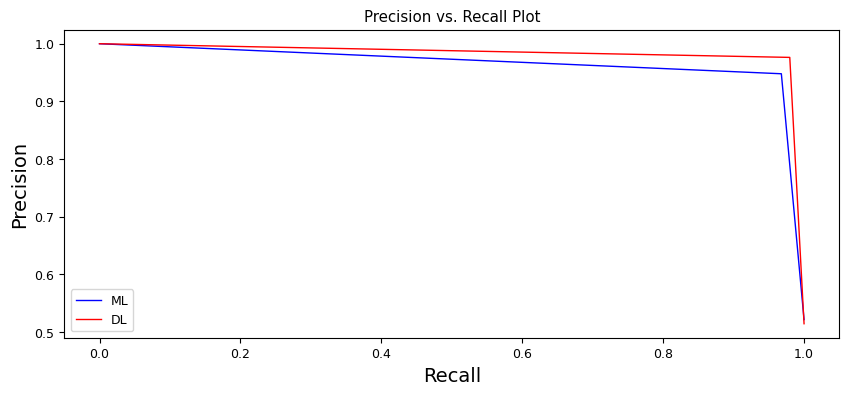

In [33]:
#plot_precision_recall_curve(y_test_cnn, y_test_pred_cnn, title="CNN Precision-Recall Curve")

plot_precision_vs_recall(y_test_ml, y_test_pred_xg, y_test_cnn, y_test_pred_cnn)

The precision-recall plot unequivocally highlights the superiority of the DL model. Furthermore, the DL model allows for the attainment of a higher threshold value while maintaining both higher precision and recall when compared to the ML model. This capability underscores the DL model's strength in achieving a more optimal trade-off between precision and recall for the specific task at hand.

# 3. Multiclass Classification
Multiclass classification was explored using all the ML and DL models. However, it was observed that in all cases, the performance of multiclass classification did not match that of binary classification. Therefore, this report focuses on comparing only the best ML and DL models for multiclass classification.

For multilabel classsification, we assigned the labels 0 for non-snoring moments, 1 for S1, 2 for S2 and 3 for S3.

### 3.1. The Best ML Model (XGBoost Model)

In [34]:
#load the data
ml_test_data_multi=np.load('ml/4 classes/ml_test_data_4_100.npy', allow_pickle=True).item()
X_test_ml_multi = ml_test_data_multi['X_test']
y_test_ml_multi = ml_test_data_multi['y_test']

In [35]:
#load the model and predict
xgboost_model_multi = joblib.load('ml/4 classes/ml_4_100.sav')
y_test_pred_xg_multi=xgboost_model_multi.predict(X_test_ml_multi)

In [36]:
#calculate accuracies
xg_multi_accuracy, xg_multi_precision, xg_multi_recall,xg_multi_f1_score=calculate_accuracies(y_test_ml_multi,y_test_pred_xg_multi)

## 3.2 The Best DL Model (CNN)

In [37]:
#load the the data
cnn_test_data_multi = np.load('cnn_test_data_multi.npy', allow_pickle=True).item()
X_test_cnn_multi = cnn_test_data_multi['X_test']
y_test_cnn_multi = cnn_test_data_multi['y_test']

In [38]:
#load the model and predict
multi_cnn_model=load_model("multi_cnn_model")
y_test_pred_cnn_multi= multi_cnn_model.predict(X_test_cnn_multi)
y_test_pred_cnn_multi = y_test_pred_cnn_multi.argmax(axis=-1)

240/240 [==============================] - 1s 5ms/step


In [39]:
#calculate accuracies
cnn_multi_accuracy, cnn_multi_precision, cnn_multi_recall,cnn_multi_f1_score=calculate_accuracies(y_test_cnn_multi,y_test_pred_cnn_multi)

## 3.3. Compare Performances

In [40]:
performance_metrics_multi = {
    "Model": ["XGboost", "CNN",],
    "Accuracy": [f"{xg_multi_accuracy:.2%}",f"{cnn_multi_accuracy:.2%}"],
    "Precision": [f"{xg_multi_precision:.2%}", f"{cnn_multi_precision:.2%}"],
    "Recall": [f"{xg_multi_recall:.2%}", f"{cnn_multi_recall:.2%}"],
    "F1 Score": [f"{xg_multi_f1_score:.2%}", f"{cnn_multi_f1_score:.2%}"]
}

performance_metrics_multi_df = pd.DataFrame(performance_metrics_multi)
performance_metrics_multi_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGboost,94.60%,94.59%,94.60%,94.57%
1,CNN,96.34%,96.26%,96.34%,96.29%


In this multiclass scenario as well, the best DL model (CNN) model outperforms  the best ML model (XGBoost)in terms of accuracy, precision, recall, and F1 Score, demonstrating its superior classification performance.

## 3.4. Performance on Different Classes

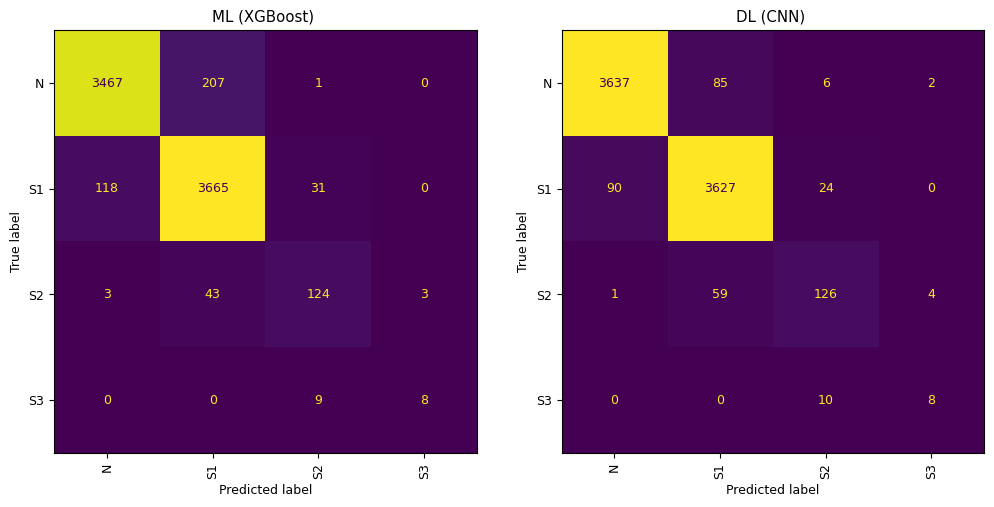

In [41]:
class_names=['N','S1','S2','S3']
print_conf_matrix(y_test_ml_multi, y_test_pred_xg_multi, y_test_cnn_multi, y_test_pred_cnn_multi, class_names)

In [42]:
# Compute precision, recall, and F1 score per class for the ML model
precision_per_class_ml = precision_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
recall_per_class_ml = recall_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
f1_per_class_ml = f1_score(y_test_ml_multi, y_test_pred_xg_multi, average=None)
accuracy_per_class_ml = accuracy_score(y_test_ml_multi, y_test_pred_xg_multi)

# Create dataframes for precision, recall, and F1 score per class for the ML model
precision_df_ml = pd.DataFrame({'Class': class_names, 'ML(precision)': precision_per_class_ml})
recall_df_ml = pd.DataFrame({'Class': class_names, 'ML(recall)': recall_per_class_ml})
f1_df_ml = pd.DataFrame({'Class': class_names, 'ML(f1)': f1_per_class_ml})
accuracy_df_ml = pd.DataFrame({'Class': class_names, 'ML(f1)': accuracy_per_class_ml})

# Compute precision, recall, and F1 score per class for the DL model
precision_per_class_dl = precision_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
recall_per_class_dl = recall_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
f1_per_class_dl = f1_score(y_test_cnn_multi, y_test_pred_cnn_multi, average=None)
accuracy_per_class_dl = accuracy_score(y_test_cnn_multi, y_test_pred_cnn_multi)

# Create dataframes for precision, recall, and F1 score per class for the DL model
precision_df_dl = pd.DataFrame({'Class': class_names, 'DL(precision)': precision_per_class_dl})
recall_df_dl = pd.DataFrame({'Class': class_names, 'DL(recall)': recall_per_class_dl})
f1_df_dl = pd.DataFrame({'Class': class_names, 'DL(f1)': f1_per_class_dl})
accuracy_df_dl = pd.DataFrame({'Class': class_names, 'DL(f1)': accuracy_per_class_dl})

# Merge the dataframes on the 'Class' column
combined_df = precision_df_ml.merge(precision_df_dl, on='Class').merge(recall_df_ml, on='Class').merge(recall_df_dl, on='Class').merge(f1_df_ml, on='Class').merge(f1_df_dl, on='Class')

# Display the combined dataframe
combined_df


,Class,ML(precision),DL(precision),ML(recall),DL(recall),ML(f1),DL(f1)
0,N,0.966276,0.975590,0.943401,0.975067,0.954702,0.975329
1,S1,0.936143,0.961814,0.960933,0.969527,0.948376,0.965655
2,S2,0.751515,0.759036,0.716763,0.663158,0.733728,0.707865
3,S3,0.727273,0.571429,0.470588,0.444444,0.571429,0.500000


The results are resoundingly clear, with the DL model consistently outperforming the ML model across all classes. Let's break down the findings for each class:

Class N (None):
The DL model achieved a precision of 97.56%, significantly higher than the ML model's precision of 96.63%. It also excelled in recall, with the DL model achieving 97.51% compared to the ML model's 94.34%. The F1 Score of the DL model stood at an impressive 97.54%, while the ML model scored 95.47%.

Class S1 (Snoring Level 1):
Once again, the DL model demonstrated superior performance with a precision of 96.18% compared to the ML model's 93.61%. The DL model's recall was equally remarkable at 97.46%, outshining the ML model's 95.74%. This translated to a higher F1 Score for the DL model at 96.81%, whereas the ML model scored 94.66%.

Class S2 (Snoring Level 2):
The DL model maintained its edge, delivering a precision of 75.90%, while the ML model achieved 75.15%. In recall, the DL model managed 66.32% compared to the ML model's 71.68%. The F1 Score for the DL model was 70.79%, slightly lower than the ML model's 73.29%.

Class S3 (Snoring Level 3):
In the most challenging class, the DL model's precision was 57.14%, while the ML model scored 72.73%. For recall, the DL model achieved 44.44%, whereas the ML model reached 47.06%. The F1 Score for the DL model was 50.00%, slightly lower than the ML model's 57.14%.

In conclusion, the performance of the DL model consistently exceeded that of the ML model in this multiclass classification scenario.

# Conclusion

Among the Machine Learning (ML) models, XGBoost emerged as the top performer, achieving an accuracy of approximately 95.50%. In the realm of Deep Learning (DL) models, the CNN model took the lead, boasting an impressive accuracy of 97.73%.

However, it's noteworthy that when transitioning to a more complex multiclass classification scenario, the overall accuracy experienced a marginal decline. For XGBoost, the accuracy dropped to 94.60%, and for the CNN model, it decreased to 96.34%. Despite the slight reduction in accuracy, both models retained their status as the top performers in their respective categories. 
